In [0]:
import keras
from keras.layers import Activation, Dense, Input
from keras.layers import Conv2D, Flatten
from keras.layers import Reshape, Conv2DTranspose
from keras.models import Model
from keras import backend as K
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import *
from keras.callbacks import ReduceLROnPlateau

In [75]:
encoder_i = Input(shape = (28,28,1))
encoder = Conv2D(16, (3,3), activation='relu', padding='same', strides=2)(encoder_i)
encoder = Conv2D(16, (3,3), activation='relu', padding='same', strides=1)(encoder)
encoder = BatchNormalization()(encoder)
encoder = Conv2D(32, (3,3), activation='relu', padding='same', strides=2)(encoder)
encoder = Conv2D(32, (3,3), activation='relu', padding='same', strides=1)(encoder)
encoder = BatchNormalization()(encoder)
encoder = Flatten()(encoder)
encoder = Dense(8*7*7, activation='relu')(encoder)
encoder = Dense(100, activation = 'relu')(encoder)

decoder = Dense(8*7*7, activation = 'relu')(encoder)
decoder = Dense(32*7*7, activation = 'relu')(decoder)
decoder = Reshape((7, 7, 32))(decoder)
decoder = Conv2D(32, (3,3), activation='relu', padding='same', strides=1)(decoder)
decoder = BatchNormalization()(decoder)
decoder = UpSampling2D((2,2))(decoder)
decoder = Conv2D(16, (3,3), activation='relu', padding='same', strides=1)(decoder)
decoder = Conv2D(16, (3,3), activation='relu', padding='same', strides=1)(decoder)
decoder = BatchNormalization()(decoder)
decoder = UpSampling2D((2,2))(decoder)
decoder = Conv2D(1, (3,3), activation='relu', padding='same', strides=1)(decoder)

model = Model(inputs = encoder_i, outputs = decoder)
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=adam, loss='mse')
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 14, 14, 16)        2320      
_________________________________________________________________
batch_normalization_29 (Batc (None, 14, 14, 16)        64        
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 7, 7, 32)          4640      
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
batch_normalization_30 (Batc (None, 7, 7, 32)          128       
__________

In [0]:
lr_red = ReduceLROnPlateau(monitor = 'val_loss',
                           patience = 5,
                           verbose = 1,
                           factor = 0.5,
                           min_lr = 0.0000000001
                           )

In [0]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train/255
x_test = x_test/255

train = x_train[:1000]

noise = np.random.normal(0.2,0.1,(train.shape))
noisy_train = train+noise

train = train.reshape(1000,28,28,1)
noisy_train = noisy_train.reshape(1000,28,28,1)

In [76]:
model.fit(noisy_train,
          train,
          epochs = 200,
          validation_split = 0.1,
          callbacks = [lr_red]
         )

Train on 900 samples, validate on 100 samples
Epoch 1/200
900/900 [==============================] - 4s 5ms/step - loss: 0.1501 - val_loss: 0.1677
Epoch 2/200
900/900 [==============================] - 0s 403us/step - loss: 0.0644 - val_loss: 0.0660
Epoch 3/200
900/900 [==============================] - 0s 391us/step - loss: 0.0517 - val_loss: 0.0488
Epoch 4/200
900/900 [==============================] - 0s 391us/step - loss: 0.0435 - val_loss: 0.0456
Epoch 5/200
900/900 [==============================] - 0s 405us/step - loss: 0.0383 - val_loss: 0.0412
Epoch 6/200
900/900 [==============================] - 0s 388us/step - loss: 0.0339 - val_loss: 0.0399
Epoch 7/200
900/900 [==============================] - 0s 396us/step - loss: 0.0303 - val_loss: 0.0346
Epoch 8/200
900/900 [==============================] - 0s 414us/step - loss: 0.0272 - val_loss: 0.0342
Epoch 9/200
900/900 [==============================] - 0s 396us/step - loss: 0.0248 - val_loss: 0.0304
Epoch 10/200
900/900 [=======

In [0]:
images = model.predict(noisy_train)

In [0]:
img = 50
image = images[img].reshape(28,28)
real = train[img].reshape(28,28)
noisy = noisy_train[img].reshape(28,28)

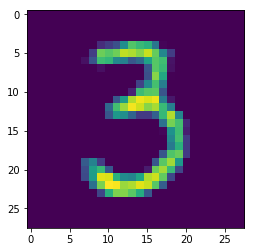

In [79]:
plt.imshow(image)

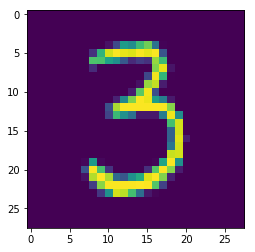

In [80]:
plt.imshow(real)

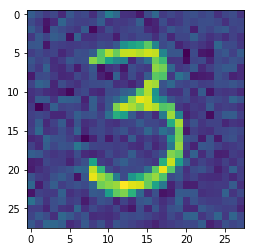

In [81]:
plt.imshow(noisy)